# Titanic Dataset


### Question

* How different variables are dependent on no of people survived ?
* What is the highest age who has survived?
* How many males and females survived from this accident?
* what is the percentage of people survived?

In [111]:
#Now fetching the titanic data using pandas 
import pandas as pd

titanic_data=pd.read_csv('titanic-data.csv')


In [112]:
Total_people_survived=titanic_data['Survived'].sum()
print Total_people_survived
total_size=titanic_data.count(axis=0)
print total_size['Survived']
percentage_of_people_survived = ((Total_people_survived)/(total_size))['Survived']*100
print percentage_of_people_survived

342
891
38.3838383838


In [113]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
def relation(x,y):
    people_survived= titanic_data.groupby(x,as_index=False).mean()
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title("Relation between "+x+" and people "+y)
    print plt.plot(people_survived[y])


In [114]:
def correlation(x,y):
    std_x=(x-x.mean())/x.std()
    std_y=(y-y.mean())/y.std()
    return (std_x*std_y).mean()


-0.33810114703176608

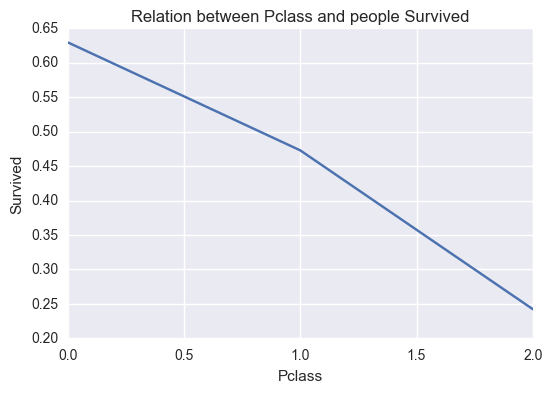

In [115]:
relation('Pclass','Survived')
correlation(titanic_data['Pclass'],titanic_data['Survived'])

#### Conclusion 1

* It can be seen that the high class people were the ones who survived. High class people are the one who were rescued first.
* It can be seen from correlation being negative that as class goes from 1st to third class the survivors decrease.


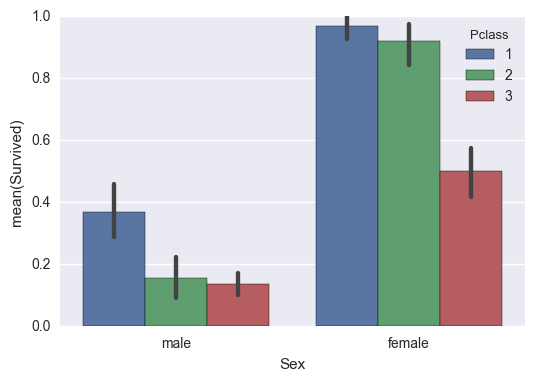

In [116]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# people_survived=titanic_data['Age']
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=titanic_data);

0.54274155868170826

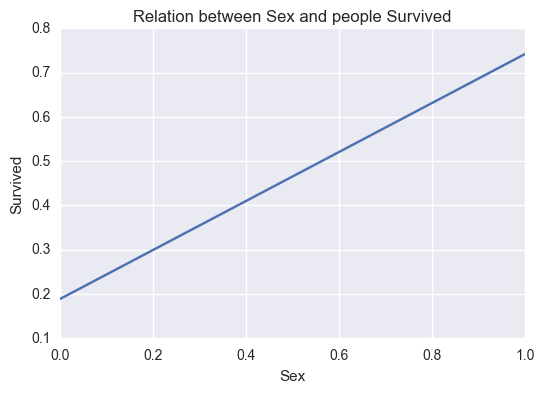

In [117]:
def sexs(string):
    if string=='male':
        return 0
    else:
        return 1

titanic_data['Sex']=titanic_data['Sex'].apply(sexs)
relation('Sex','Survived')
correlation(titanic_data['Sex'],titanic_data['Survived'])

In [118]:
max_females_survived= titanic_data.groupby('Survived',as_index=False)['Sex'].sum()
print max_females_survived[1:]
total_males_survived=Total_people_survived-max_females_survived[1:]
print total_males_survived

   Survived  Sex
1         1  233
   Survived  Sex
1       341  109


#### Conclusion 2
* This can be seen in the graph that females were rescued first.

* positive Correlation also proves the above relation.

* 342 people survived from the accident.

* 233 females and 109 males survived from the incident.

* 38 percent people survived from the tragedy.

In [119]:
correlation(titanic_data['Age'],titanic_data['Survived'])

-0.077884306616092594

In [126]:
max_age_of_people_survived= titanic_data.groupby('Survived',as_index=False)['Age'].max()

print max_age_of_people_survived


   Survived       Age
0         0  (70, 80]
1         1  (70, 80]


In [121]:

titanic_data['Age']=pd.cut(titanic_data['Age'],[1,10,20,30,40,50,60,70,80,90,100])


0      (1, 10]
1     (10, 20]
2     (20, 30]
3     (30, 40]
4     (40, 50]
5     (50, 60]
6     (60, 70]
7     (70, 80]
8     (80, 90]
9    (90, 100]
Name: Age, dtype: category
Categories (10, object): [(1, 10] < (10, 20] < (20, 30] < (30, 40] ... (60, 70] < (70, 80] < (80, 90] < (90, 100]]


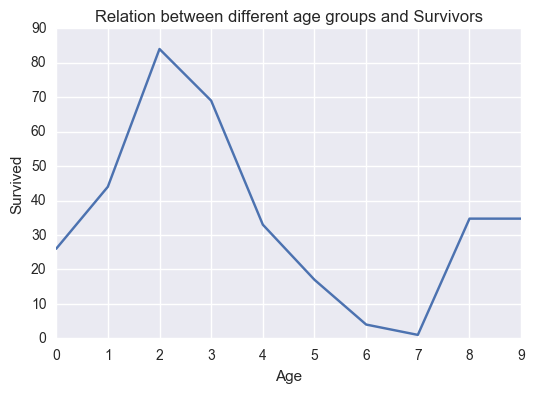

In [122]:


%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
def relation_age(x,y):
    people_survived= titanic_data.groupby(x,as_index=False).sum()
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title('Relation between different age groups and Survivors')
    people_survived=people_survived.fillna(people_survived.mean())
    print people_survived[x]
    print plt.plot(people_survived[y])
relation_age('Age','Survived')

#### Conclusion 3

* Younger age group people (20-30)yrs tend to survive from the accident more than the smaller children and people of older age.
* From negative correlation it can be seen as age increase tendency to survive decrease.
* Maximum age of person survived is 80 Yrs

-0.035282855228175827

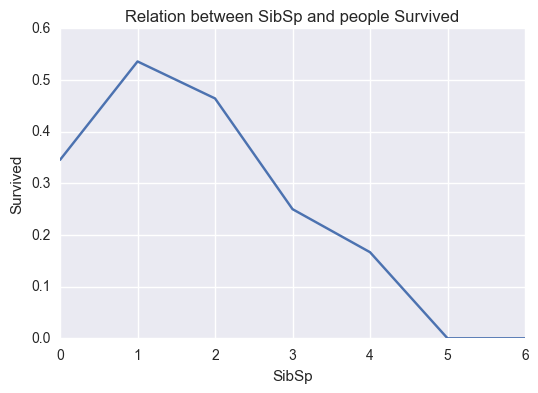

In [123]:
relation('SibSp','Survived')
correlation(titanic_data['SibSp'],titanic_data['Survived'])

#### Conclusion 4

* Less siblings tendency to survival increases.
* negative correlation proves the above statement as well.


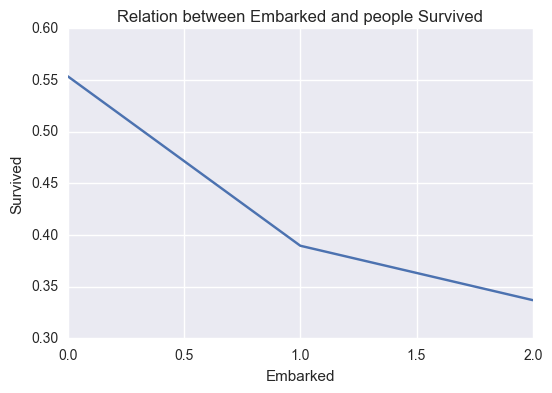

In [124]:
relation('Embarked','Survived')


0.081537791587317957

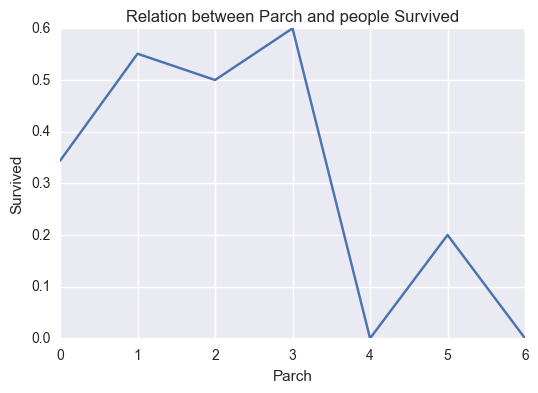

In [125]:
relation('Parch','Survived')
correlation(titanic_data['Parch'],titanic_data['Survived'])

There is not much relation seen in this case.

### References
* https://pandas.pydata.org/pandas-docs/stable/generated/pandas.cut.html
* https://stackoverflow.com/questions/17841149/pandas-groupby-how-to-get-a-union-of-strings
* https://classroom.udacity.com/nanodegrees/nd002/parts/0021345403/modules/317671873575460/lessons/5430778793/concepts/53961386540923
* https://matplotlib.org/api/pyplot_api.html

### Limitation
* The difference between the sample and the population, we don't know how the sample was chosen from the actual population of people that were on the Titanic. There could have been some sort of intentional or unintentional bias in how the sample was selected.
